The test mass would take 28.55686245854129 seconds to reach the bottom of the 4 km shaft.
Numerical free-fall time: 28.55686245854129 sec


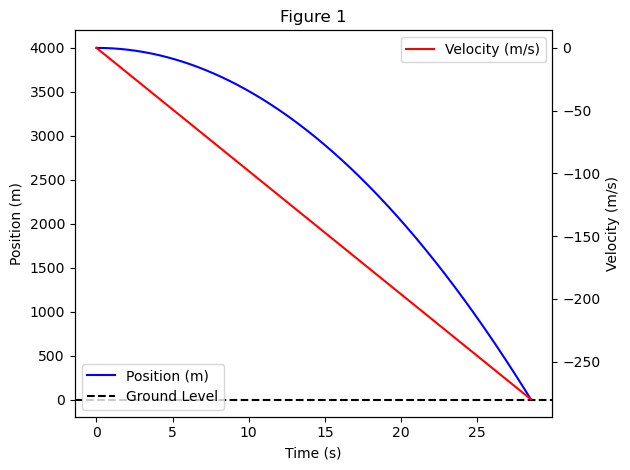

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# calculating time for test mass to reach bottom of 4km shaft
g = 9.81 # m/s^2
alpha = 0 # drag coeff
d = 4000 # m

dvdt = -g
t = np.sqrt(2*d/g)
print(f"The test mass would take {t} seconds to reach the bottom of the 4 km shaft.")

# reduce ode
def acceleration(v, s):
    y, v = s
    dydt = v
    dvdt = -g
    return [dydt, dvdt]

def hit_ground(t, s):
    return s[0]
hit_ground.terminal = True
hit_ground.direction = -1

# numerically solve ode
y0 = 4000 # m
v0 = 0 # m/s

t_span = (0, 2 * t)
soln = solve_ivp(acceleration, t_span, [y0, v0], t_eval=np.linspace(0, 2 * t, 1000), events=hit_ground)

t_num = soln.t
y_num = soln.y[0]
v_num = soln.y[1]
t_impact = soln.t_events[0][0]
print(f"Numerical free-fall time: {t_impact} sec")

# plot results
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(t_num, y_num, 'b-', label='Position (m)')
ax2.plot(t_num, v_num, 'r-', label='Velocity (m/s)')
ax1.axhline(0, linestyle='--', color='black', label='Ground Level')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Position (m)')
ax2.set_ylabel('Velocity (m/s)')
ax1.legend(loc='lower left')
ax2.legend(loc='upper right')
plt.title('Figure 1')
fig.tight_layout()

Both the analytical and the numerical times calculated appear to be exactly the same. Although, any very precise differences that might not have been reported could have been due to differences in the solver versus the normal Python calculator.

Numerical fall time with variable g and drag: 83.516872 sec


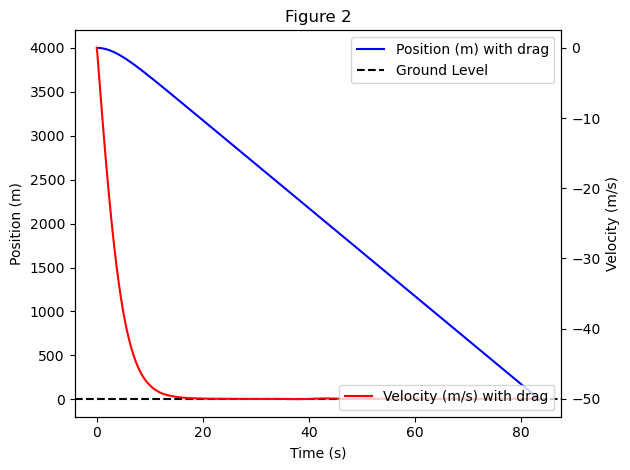

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

g0 = 9.81  # (m/s^2)
R_e = 6371e3 # m

def g(y):
    return g0 * (R_e + y) / R_e

v_terminal = 50  # m/s
alpha = g0 / v_terminal**2  # drag coefficient

def fall_drag(t, s):
    y, v = s
    dydt = v
    dvdt = -g(y) + alpha * v**2 * np.sign(-v)  # drag opposes motion
    return [dydt, dvdt]

# solve ode with drag
t_span = (0, 100)
soln_drag = solve_ivp(fall_drag, t_span, [y0, v0], t_eval=np.linspace(0, 100, 1000), events=hit_ground)

t_drag = soln_drag.t
y_drag = soln_drag.y[0]
v_drag = soln_drag.y[1]
t_impact_drag = soln_drag.t_events[0][0]
print(f"Numerical fall time with variable g and drag: {t_impact_drag:.6f} sec")

# plot results with drag
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(t_drag, y_drag, 'b-', label='Position (m) with drag')
ax2.plot(t_drag, v_drag, 'r-', label='Velocity (m/s) with drag')
ax1.axhline(0, linestyle='--', color='black', label='Ground Level')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Position (m)')
ax2.set_ylabel('Velocity (m/s)')
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')
plt.title('Figure 2')
fig.tight_layout()

Incorporating a height-dependent g would slightly increase the fall time because g will tend to decrease as the object falls deeper into the Earth.

The value of alpha can be calculated with the terminal velocity. Since that occurs when gravitational force and drag force are balanced, the drag coefficient can be calibrated based on the expected terminal velocity. Including drag increases the fall time because drag opposes the direction of motion. 

Max transverse displacement (no drag): 2.5 m
Max transverse displacement (with drag): 2.4999999999999996 m
Test mass hits wall (no drag)? Yes
Test mass hits wall (with drag)? Yes
Wall hit time (no drag): 21.882373640286087 s
Wall hit time (with drag): 29.585697504330813 s


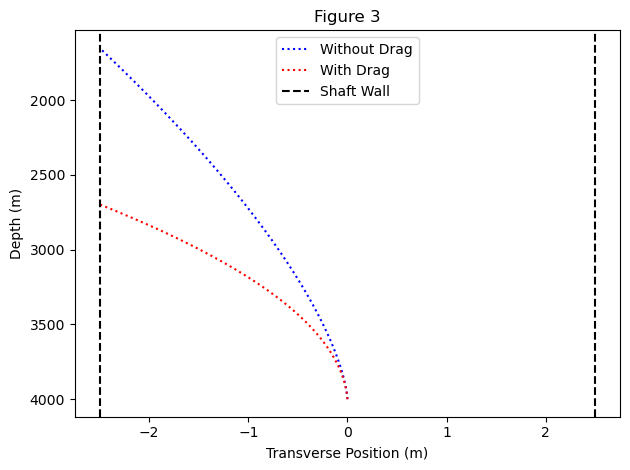

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

omega = 7.2921e-5 # rad/s

x0 = 0
vx0 = 0

def g_var(y):
    return g0 * (R_e + y) / R_e

def fall_coriolis(t, s):
    x, vx, y, vy = s
    g_y = g_var(y)

    dxdt = vx
    dydt = vy
    dvxdt = 2 * omega * vy
    dvydt = -g_y - 2 * omega * vx

    return [dxdt, dvxdt, dydt, dvydt]

def fall_coriolis_drag(t, s):
    x, vx, y, vy = s
    g_y = g_var(y)

    dxdt = vx
    dydt = vy
    dvxdt = 2 * omega * vy - alpha * vx**2 * np.sign(vx)
    dvydt = -g_y - 2 * omega * vx + alpha * vy**2 * np.sign(-vy)

    return [dxdt, dvxdt, dydt, dvydt]

def hit_ground(t, s):
    return s[2]
hit_ground.terminal = True
hit_ground.direction = -1

def hit_wall(t, s):
    x = s[0]
    return 2.5 - np.abs(x)
hit_wall.terminal = True
hit_wall.direction = -1

# solve ode for coriolis effect w/o drag
soln_coriolis = solve_ivp(fall_coriolis, (0, 500), [x0, vx0, y0, v0], events=[hit_ground, hit_wall], max_step=0.1)
soln_coriolis_drag = solve_ivp(fall_coriolis_drag, (0, 500), [x0, vx0, y0, v0], events=[hit_ground, hit_wall], max_step=0.1)

# solutions
t_coriolis, x_coriolis, y_coriolis = soln_coriolis.t, soln_coriolis.y[0], soln_coriolis.y[2]
t_coriolis_drag, x_coriolis_drag, y_coriolis_drag = soln_coriolis_drag.t, soln_coriolis_drag.y[0], soln_coriolis_drag.y[2]

wall_hit_time = soln_coriolis.t_events[1][0] if soln_coriolis.t_events[1].size > 0 else None
wall_hit_time_drag = soln_coriolis_drag.t_events[1][0] if soln_coriolis_drag.t_events[1].size > 0 else None

print(f"Max transverse displacement (no drag): {np.max(np.abs(x_coriolis))} m")
print(f"Max transverse displacement (with drag): {np.max(np.abs(x_coriolis_drag))} m")
print(f"Test mass hits wall (no drag)? {'Yes' if wall_hit_time else 'No'}")
print(f"Test mass hits wall (with drag)? {'Yes' if wall_hit_time_drag else 'No'}")
if wall_hit_time:
    print(f"Wall hit time (no drag): {wall_hit_time} s")
if wall_hit_time_drag:
    print(f"Wall hit time (with drag): {wall_hit_time_drag} s")

# plot transverse position vs depth
fig, ax = plt.subplots()
ax.plot(x_coriolis, y_coriolis, linestyle=':', color='blue', label='Without Drag')
ax.plot(x_coriolis_drag, y_coriolis_drag, linestyle=':', color='red', label='With Drag')
ax.axvline(-2.5, linestyle='--', color='black', label='Shaft Wall')
ax.axvline(2.5, linestyle='--', color='black')
ax.set_xlabel('Transverse Position (m)')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()
ax.set_title('Figure 3')
ax.legend()
fig.tight_layout()

Drag does not make a difference on whether or not the test mass hits the shaft wall. It will hit the wall either way.

Time to reach other side: 10000.0 s
Time to reach Earth's center: 5000.0 s
Speed at Earth's center: 7906.35 m/s
Orbital period: 5060.9 s


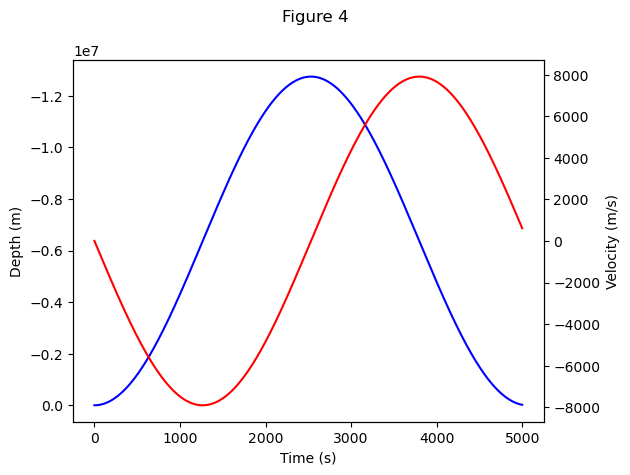

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

y0 = R_e # m
v0 = 0  # m/s
M_e = 5.972e24  # kg
G = 6.67430e-11  # m^3/kg/s^2

def g_linear(y):
    return g0 * y / R_e

# define the equations of motion for the infinitely deep mine (pole-to-pole tunnel)
def tunnel_motion(t, s):
    y, vy = s
    dydt = vy
    dvydt = -g_linear(y)
    return [dydt, dvydt]

# solve the equations numerically
t_span = (0, 5000)
t_eval = np.linspace(0, 5000, 1000)
soln_tunnel = solve_ivp(tunnel_motion, t_span, [y0, v0], t_eval=t_eval, events=lambda t, s: s[0])

t_cross = 2 * soln_tunnel.t[-1]
v_center = np.max(np.abs(soln_tunnel.y[1]))

# compute the orbital period using circular orbit formula
orbital_pd = 2 * np.pi * np.sqrt(R_e**3 / (G * M_e))

print(f"Time to reach other side: {t_cross:.1f} s")
print(f"Time to reach Earth's center: {soln_tunnel.t[-1]:.1f} s")
print(f"Speed at Earth's center: {v_center:.2f} m/s")
print(f"Orbital period: {orbital_pd:.1f} s")

# plot depth and velocity as a function of time
fig, ax1 = plt.subplots()
ax1.plot(soln_tunnel.t, soln_tunnel.y[0] - R_e, label='Depth', color='b')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Depth (m)')
ax1.tick_params(axis='y')
ax1.invert_yaxis()
ax2 = ax1.twinx()
ax2.plot(soln_tunnel.t, soln_tunnel.y[1], label='Velocity', color='r')
ax2.set_ylabel('Velocity (m/s)')
ax2.tick_params(axis='y')
fig.suptitle('Figure 4')
fig.tight_layout()

The graphs appear to be identical but with a phase shift difference.

The "crossing-time" is about half of the orbital period. 

n=0: Time to reach center: 1265.1 s, Speed at center: -7910.35 m/s
n=1: Time to reach center: 1095.1 s, Speed at center: -10440.97 m/s
n=2: Time to reach center: 1033.4 s, Speed at center: -12207.30 m/s
n=9: Time to reach center: 942.3 s, Speed at center: -18400.49 m/s


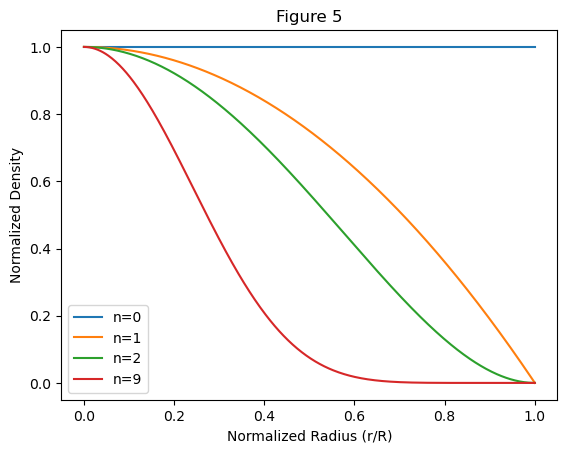

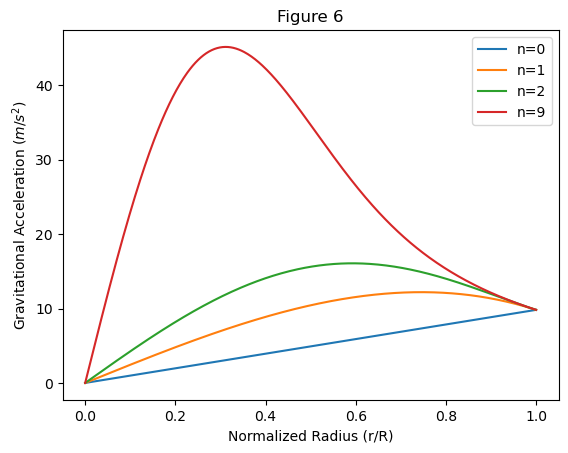

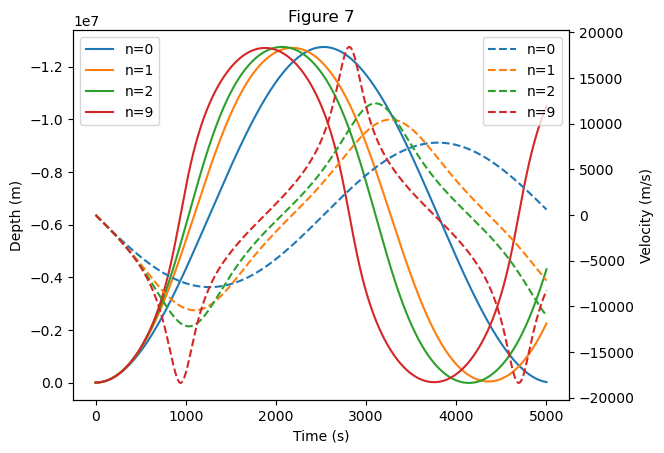

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, quad

# define the density profile
n_vals = [0, 1, 2, 9]

def density_prof(r, n, rho_n):
    return rho_n * (1 - (r**2 / R_e**2))**n

# compute the normalization constant rho_n
def rho_n(n):
    integral, _ = quad(lambda r: (1 - (r**2 / R_e**2))**n * r**2, 0, R_e)
    rho_n = M_e / (4 * np.pi * integral)
    return rho_n

rhon_vals = {n: rho_n(n) for n in n_vals}

# compute gravitational acceleration for non-uniform density
def g_nonuniform(r, n):
    if r == 0:
        return 0
    rho_n = rhon_vals[n]
    integral, _ = quad(lambda rp: density_prof(rp, n, rho_n) * rp**2, 0, r)
    mass_enc = 4 * np.pi * integral
    return G * mass_enc / (r**2)

# plot the normalized density profiles
r_vals = np.linspace(0, R_e, 500)
fig1, ax1 = plt.subplots()
for n in n_vals:
    ax1.plot(r_vals / R_e, (1 - (r_vals**2 / R_e**2))**n, label=f'n={n}')
ax1.set_xlabel('Normalized Radius (r/R)')
ax1.set_ylabel('Normalized Density')
ax1.set_title('Figure 5')
ax1.legend()
fig.tight_layout()

# plot the force profiles
fig2, ax2 = plt.subplots()
for n in n_vals:
    g_vals = [g_nonuniform(r, n) for r in r_vals]
    ax2.plot(r_vals / R_e, g_vals, label=f'n={n}')
ax2.set_xlabel('Normalized Radius (r/R)')
ax2.set_ylabel('Gravitational Acceleration $(m/s^2)$')
ax2.set_title('Figure 6')
ax2.legend()
fig.tight_layout()

# define the motion equations
def tunnel_motion_n(t, s, n):
    y, vy = s
    dydt = vy
    dvydt = -g_nonuniform(y, n)
    return [dydt, dvydt]

# define event function for reaching center
def event_reach_center(t, y, n):
    return y[0]
event_reach_center.terminal = True
event_reach_center.direction = -1

# solve for different n values
fig3, ax3 = plt.subplots()
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Depth (m)')
ax4 = ax3.twinx()
ax4.set_ylabel('Velocity (m/s)')
for n in n_vals:
    t_span = (0, 5000)
    t_eval = np.linspace(0, 5000, 1000)
    soln = solve_ivp(tunnel_motion_n, t_span, [y0, v0], t_eval=t_eval, args=(n,), events=lambda t, y, n=n: event_reach_center(t, y, n))
    t_center = soln.t_events[0][0]
    v_center = np.interp(t_center, soln.t, soln.y[1])
    print(f'n={n}: Time to reach center: {t_center:.1f} s, Speed at center: {v_center:.2f} m/s')
    ax3.plot(soln.t, soln.y[0] - R_e, label=f'n={n}')
    ax4.plot(soln.t, soln.y[1], linestyle='--', label=f'n={n}')
ax3.invert_yaxis()
ax3.set_title('Figure 7')
ax3.legend()
ax4.legend()
fig.tight_layout()

In [6]:
R_moon = 1.737e6  # m
M_moon = 7.34767309e22  # kg
y0_moon = R_moon

# solve earth and moon tunnel motion
def g_constant(r, R, M):
    return G * M / R**3 * r

def tunnel_motion(t, s, R, M):
    y, vy = s
    dydt = vy
    dvydt = -g_constant(y, R, M)
    return [dydt, dvydt]

def event_center(t, y):
    return y[0]
event_center.terminal = True
event_center.direction = -1

# earth solution
soln_earth = solve_ivp(
    lambda t, y: tunnel_motion(t, y, R_e, M_e), (0, 10000), [y0, v0], events=event_center, dense_output=True)
tcross_earth = soln_earth.t_events[0][0]
v_center_earth = np.interp(tcross_earth, soln_earth.t, soln_earth.y[1])

# moon solution
soln_moon = solve_ivp(
    lambda t, y: tunnel_motion(t, y, R_moon, M_moon), (0, 10000), [y0_moon, v0], events=event_center, dense_output=True)
tcross_moon = soln_moon.t_events[0][0]
v_center_moon = np.interp(tcross_moon, soln_moon.t, soln_moon.y[1])

# density comparison
volume_earth = 4 / 3 * np.pi * R_e**3
volume_moon = 4 / 3 * np.pi * R_moon**3
density_earth = M_e / volume_earth
density_moon = M_moon / volume_moon
density_ratio = density_moon / density_earth

# output results
print(f"Earth: Time to center = {tcross_earth} s, Speed at center = {np.abs(v_center_earth)} m/s")
print(f"Moon: Time to center = {tcross_moon} s, Speed at center = {np.abs(v_center_moon)} m/s")
print(f"Density of Moon / Earth = {density_ratio}")

Earth: Time to center = 1265.1254354683083 s, Speed at center = 7910.373733374103 m/s
Moon: Time to center = 1623.620728728915 s, Speed at center = 1680.2144586854693 m/s
Density of Moon / Earth = 0.6070904294553792


The greater the density, the shorter the fall time. They have an inverse square-root relationship, so time correlates with the inverse square-root of density.